In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

mouse_data = '/Users/danvaldes/Desktop/bootcamp/repo/05-Matplotlib/Homework/Instructions/Pymaceuticals/data/mouse_drug_data.csv'
trial_data = '/Users/danvaldes/Desktop/bootcamp/repo/05-Matplotlib/Homework/Instructions/Pymaceuticals/data/clinicaltrial_data.csv'

mouse_df = pd.read_csv(mouse_data)
trial_df = pd.read_csv(trial_data)

# inner join on mouse id because its the only column shared by both rows
clinical_df = pd.merge(mouse_df, trial_df, on='Mouse ID', how = 'inner')

clinical_df.count();

In [7]:
# average tumor volume in cubic millimeters over time

df1 = clinical_df.groupby(['Drug','Timepoint'])['Tumor Volume (mm3)']

avg_vol_df = df1.mean()

avg_vol_df = avg_vol_df.reset_index()

avg_vol_df

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
5,Capomulin,25,39.939528
6,Capomulin,30,38.769339
7,Capomulin,35,37.816839
8,Capomulin,40,36.958001
9,Capomulin,45,36.236114


In [4]:
# tumor volume sem

tumor_sem = clinical_df.groupby(['Drug','Timepoint'])['Tumor Volume (mm3)'].sem()

sem_tumor_vol = pd.DataFrame(tumor_sem)
sem_tumor_vol.reset_index(inplace = True)
sem_tumor_vol.columns =  ['Drug','Timepoint','Tumor Volume SEM']

sem_tumor_vol;

In [5]:
# reformat tumor volume

pivot_avg_vol = avg_vol_df.pivot(index='Timepoint',columns='Drug',values='Tumor Volume (mm3)')
pivot_sem_tumor_vol = sem_tumor_vol.pivot(index='Timepoint',columns='Drug',values='Tumor Volume SEM')

pivot_avg_vol = pivot_avg_vol[['Capomulin','Infubinol','Ketapril','Placebo']]
pivot_sem_tumor_vol = pivot_sem_tumor_vol[['Capomulin','Infubinol','Ketapril','Placebo']]

pivot_avg_vol;
pivot_sem_tumor_vol;

In [6]:
drug_list = ['Capomulin','Infubinol','Ketapril','Placebo']
markers = ['o','^', 's', 'd',]
colors = ['red','blue','green','black']

No handles with labels found to put in legend.


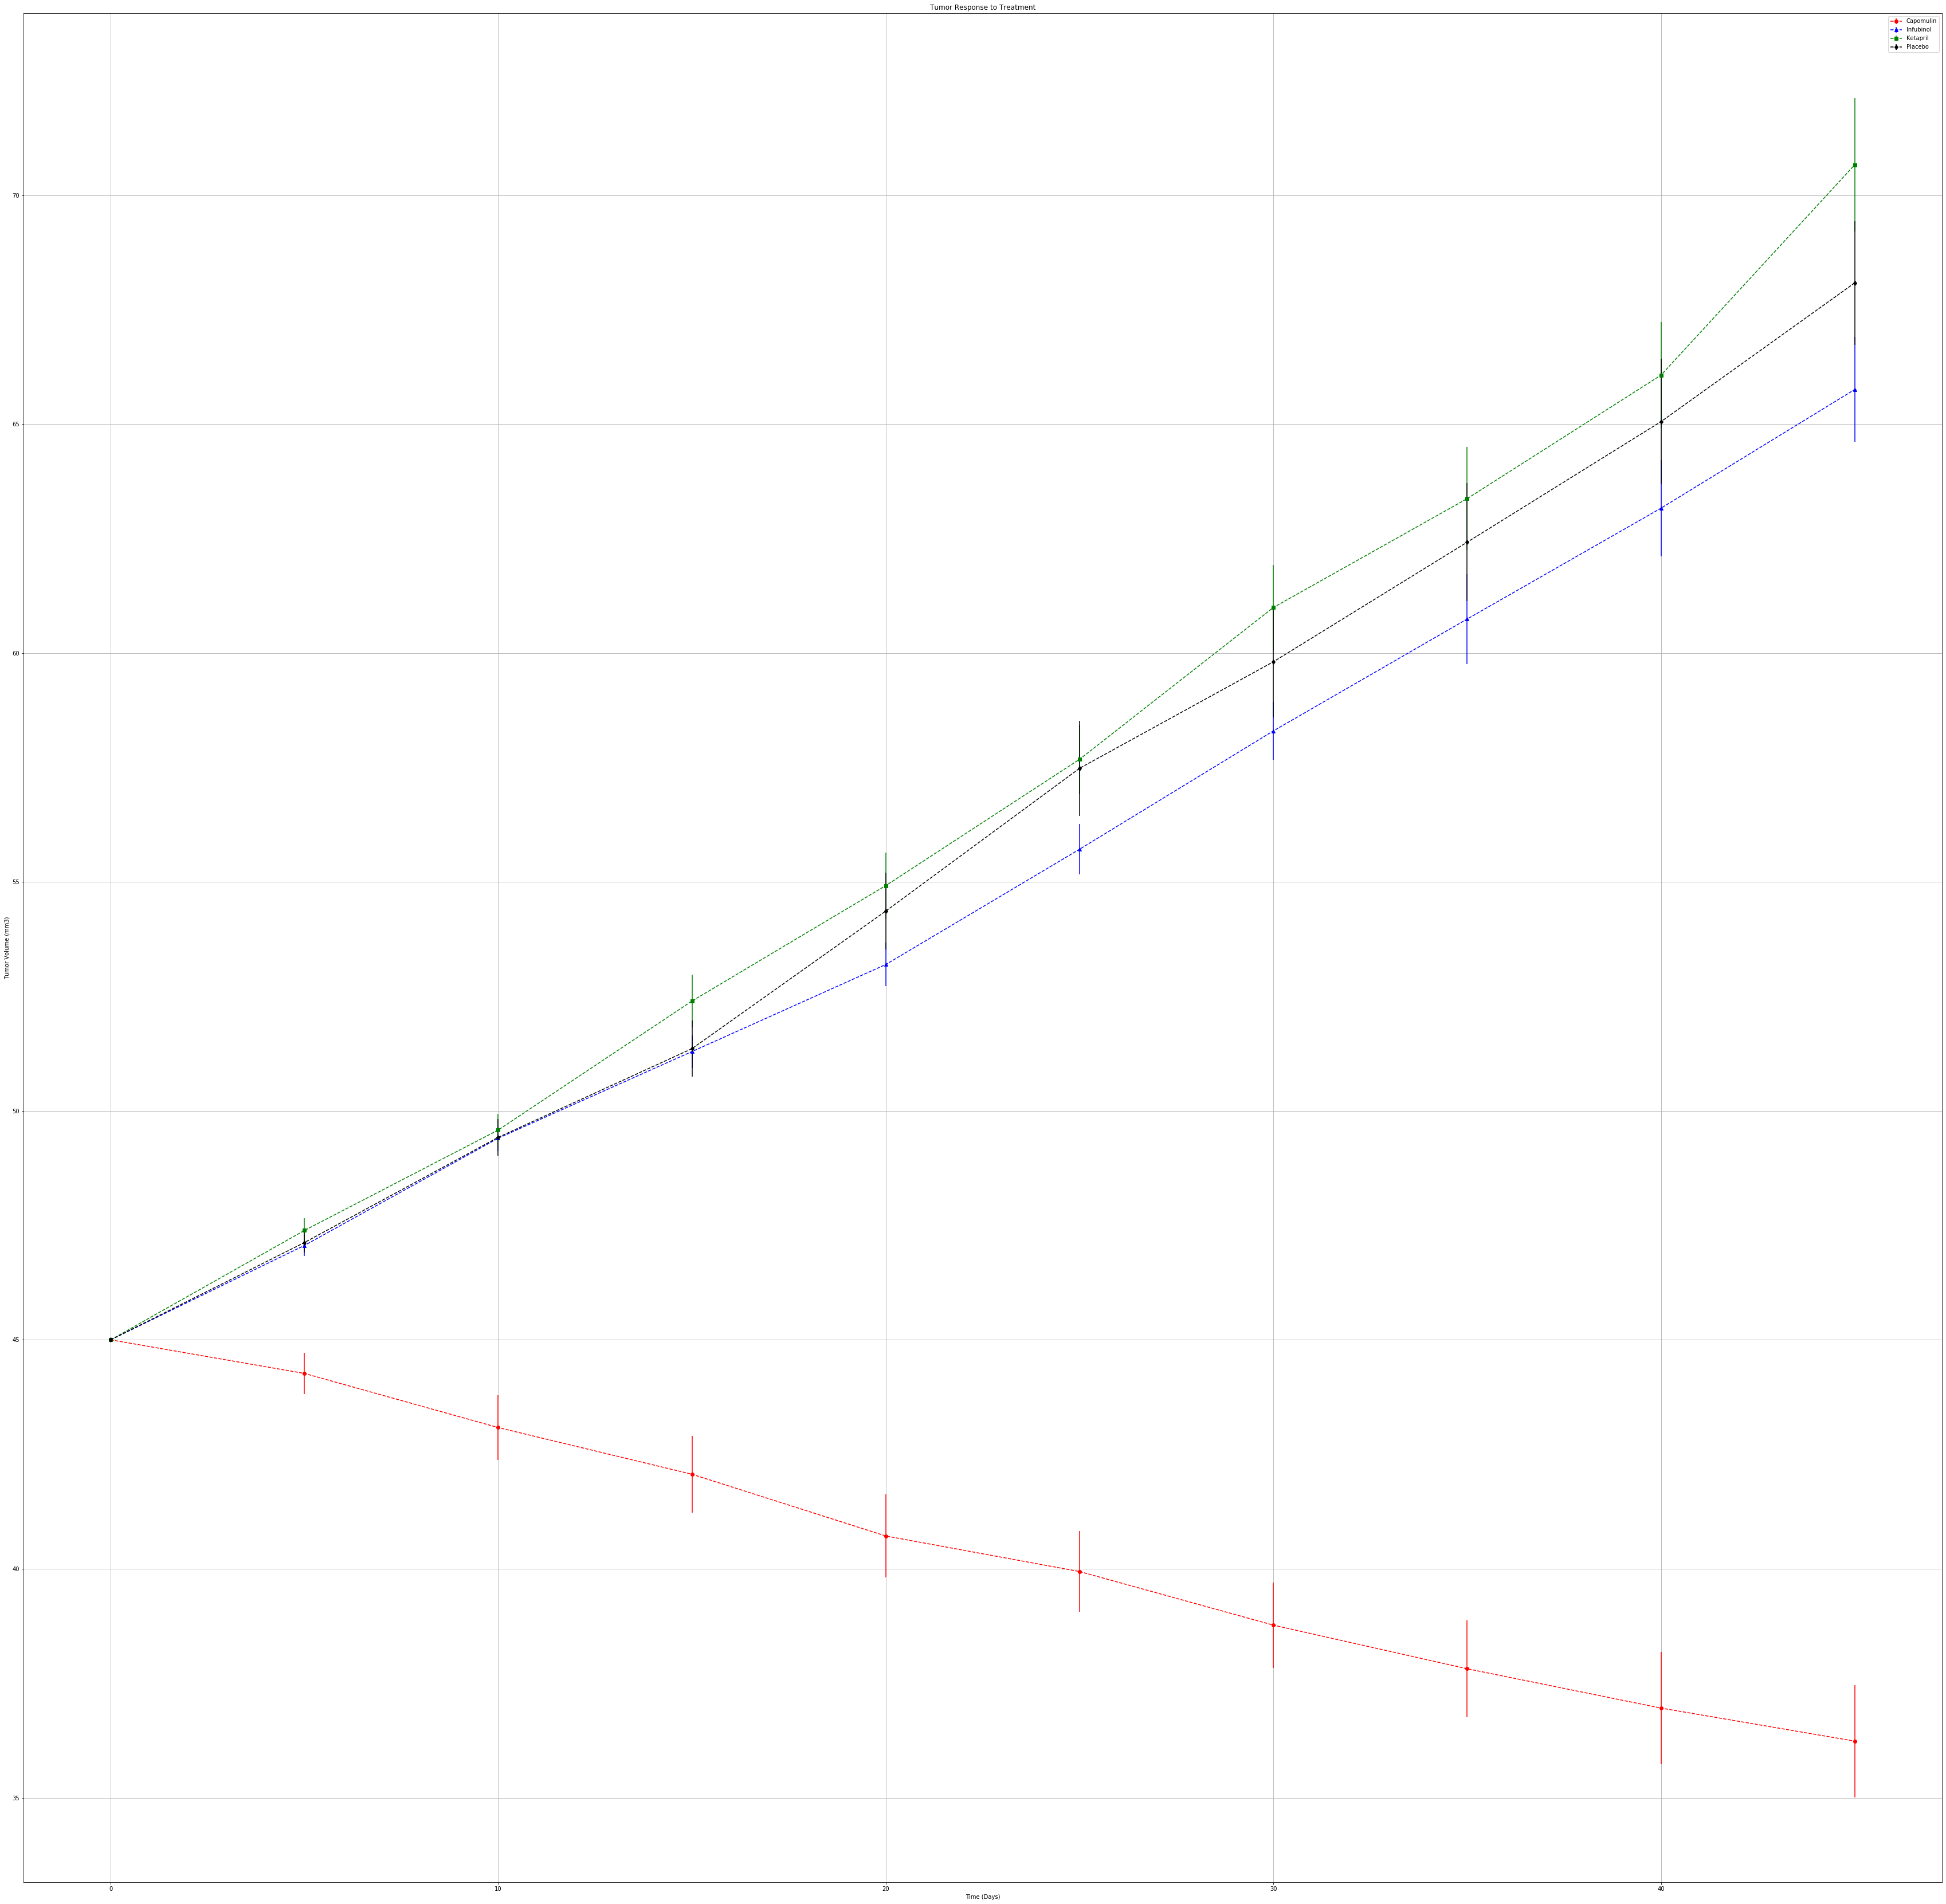

In [6]:
fig, ax = plt.subplots(figsize=(60,60))
plt.title('Tumor Response to Treatment')
plt.xlabel('Time (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.legend(loc='best')
plt.grid()

timepoints = list(pivot_avg_vol.index)

for x in drug_list:
    avg = pivot_avg_vol[x]
    err = pivot_sem_tumor_vol[x]
    plt.errorbar(timepoints, avg, yerr = err, marker = markers[drug_list.index(x)], label = drug_list[drug_list.index(x)], color = colors[drug_list.index(x)], ls='--')
    
plt.legend(loc='best')

In [1]:
# average number of metatstic sites over time

df2 = clinical_df.groupby(['Drug','Timepoint'])['Metastatic Sites']

avg_sites_df = df2.mean()

avg_sites_df = avg_sites_df.reset_index()

avg_sites_df

NameError: name 'clinical_df' is not defined

In [55]:
# metastatic site sem

site_sem = clinical_df.groupby(['Drug','Timepoint'])['Metastatic Sites'].sem()

sem_site = pd.DataFrame(site_sem)
sem_site.reset_index(inplace = True)
sem_site.columns = ['Drug','Timepoint','Metastatic Sites SEM']

sem_site;

In [59]:
#reformat metastatic sites

pivot_avg_sites = avg_sites_df.pivot(index='Timepoint',columns='Drug',values='Metastatic Sites')
pivot_sem_site = sem_site.pivot(index='Timepoint',columns='Drug',values='Metastatic Sites SEM')

pivot_avg_sites = pivot_avg_sites[['Capomulin','Infubinol','Ketapril','Placebo']]
pivot_sem_site = pivot_sem_site[['Capomulin','Infubinol','Ketapril','Placebo']]


pivot_sem_site;
pivot_avg_sites;

In [36]:
drug_list = ['Capomulin','Infubinol','Ketapril','Placebo']
markers = ['o','^', 's', 'd',]
colors = ['red','blue','green','black']

No handles with labels found to put in legend.


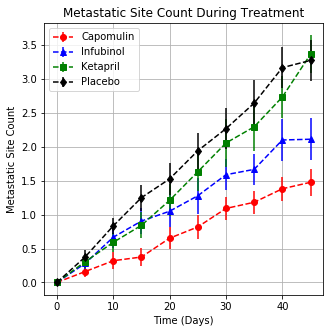

In [63]:
fig, ax = plt.subplots(figsize=(5,5))
plt.title('Metastatic Site Count During Treatment')
plt.xlabel('Time (Days)')
plt.ylabel('Metastatic Site Count')
plt.legend(loc='best')
plt.grid()


for drug in drug_list:
    
    one = pivot_avg_sites[drug]
    two = pivot_sem_site[drug]
    plt.errorbar(timepoints, one, yerr = two, marker = markers[drug_list.index(drug)], label = drug_list[drug_list.index(drug)], color = colors[drug_list.index(drug)], ls='--')
    
plt.legend(loc='best')

In [30]:
# count of mice over time

df3 = clinical_df.groupby(['Drug','Timepoint'])['Mouse ID']

survival_rate_df = df3.count()

survival_rate_df = survival_rate_df.reset_index()

survival_rate_df;

In [32]:
# reformat survivor count

pivot_survival_rate = survival_rate_df.pivot(index='Timepoint',columns='Drug',values='Mouse ID')
pivot_survival_rate = pivot_survival_rate[['Capomulin','Infubinol','Ketapril','Placebo']]
pivot_survival_rate;

No handles with labels found to put in legend.


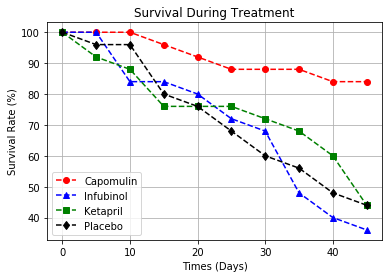

In [51]:
plt.legend(loc='best')
plt.title('Survival During Treatment')
plt.xlabel('Times (Days)')
plt.ylabel('Survival Rate (%)')
plt.grid()

for drug in drug_list:
    
    mouse_count = pivot_survival_rate[drug][0]
    survival_rate = (pivot_survival_rate[drug] / mouse_count) * 100
    survival_rate_plt = plt.errorbar(pivot_survival_rate.index,survival_rate, marker = markers[drug_list.index(drug)], label = drug_list[drug_list.index(drug)], color = colors[drug_list.index(drug)], ls='--')

plt.legend(loc='best')

## Insights

1. Capomulin seems to be the most effective drug at reducing tumor volume.
2. Infubinol and Capomulin were similarly effective at mitigating metastasis.
3. Mice treated with Infubinol had a worse survival rate than even those treated with the placebo.